In [126]:
# Imports for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize # needed to normalize GDP
from scipy.stats import zscore # NEEDED TO NORMALIZE GDP

In [127]:
zscore

<function scipy.stats._stats_py.zscore(a, axis=0, ddof=0, nan_policy='propagate')>

# Bureau of Transportation Statistics: Monthly Transportation Statistics

In [96]:
# Bureau of Transportation Statistics: Monthly Transportation Statistics
df_mts = pd.read_csv('mts.csv').drop('Index', axis=1)
df_mts.head(10)

,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,07/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,08/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,09/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
#for column in df.columns:
#    print(column)

df_mts.columns
# Notable columns:
# - Highway Fatalities Per 100 Million Vehicle Miles Traveled
# - Highway Fatalities
# - Highway Vehicle Miles Traveled - All Systems
# - State and Local Government Construction Spending - Pavement
# - State and Local Government Construction Spending - Transportation
# - State and Local Government Construction Spending - Infrastructure
# - State and Local Government Construction Spending - Automotive
# - National Highway Construction Cost Index (NHCCI)
# - Highway Fuel Price - On-highway Diesel
# - Highway Fuel Price - Regular Gasoline
# - Unemployment Rate - Seasonally Adjusted
# - Labor Force Particpation - Seasonally Adjusted
# - Unemployed - Seasonally Adjusted
# - Heavy truck sales
# - Light truck sales
# - Auto sales
# - Auto sales SAAR (millions)
# 

Index(['Date', 'Air Safety - General Aviation Fatalities',
       'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
       'Highway Fatalities',
       'U.S. Airline Traffic - Total - Seasonally Adjusted',
       'U.S. Airline Traffic - International - Seasonally Adjusted',
       'U.S. Airline Traffic - Domestic - Seasonally Adjusted',
       'Transit Ridership - Other Transit Modes - Adjusted',
       'Transit Ridership - Fixed Route Bus - Adjusted',
       'Transit Ridership - Urban Rail - Adjusted',
       ...
       'Heavy truck sales SAAR (millions)',
       'U.S. Airline Traffic - Total - Non Seasonally Adjusted',
       'Light truck sales SAAR (millions)',
       'U.S. Airline Traffic - International - Non Seasonally Adjusted',
       'Auto sales SAAR (millions)',
       'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted',
       'Transborder - Total North American Freight',
       'Transborder - U.S. - Mexico Freight',
       'U.S. marketing air carriers on-

# Google: Daily Community Mobility Data

In [98]:
# Google: Daily Community Mobility Data
df_camr = pd.read_csv('CA_mobility_report.csv')
df_camr.head(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-15,4.0,2.0,10.0,3.0,1.0,0.0
1,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-16,13.0,8.0,41.0,4.0,0.0,-2.0
2,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-17,-12.0,-15.0,63.0,-28.0,-52.0,11.0
3,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-18,-1.0,4.0,6.0,-1.0,-1.0,1.0
4,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-19,1.0,1.0,9.0,0.0,0.0,0.0
5,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-20,6.0,4.0,14.0,-1.0,1.0,0.0
6,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-21,2.0,-1.0,10.0,-1.0,-3.0,1.0
7,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-22,8.0,5.0,28.0,6.0,6.0,-1.0
8,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-23,10.0,6.0,36.0,5.0,5.0,-1.0
9,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-24,3.0,2.0,19.0,-1.0,3.0,0.0


In [99]:
for column in df_camr.columns:
    print(column)
# Notable columns:
# - transit_stations_percent_change_from_baseline
# - parks_percent_change_from_baseline
# - workpalces_percent_change_from_baseline
# - residential_percent_change_from_baseline

country_region_code
country_region
sub_region_1
sub_region_2
metro_area
iso_3166_2_code
census_fips_code
place_id
date
retail_and_recreation_percent_change_from_baseline
grocery_and_pharmacy_percent_change_from_baseline
parks_percent_change_from_baseline
transit_stations_percent_change_from_baseline
workplaces_percent_change_from_baseline
residential_percent_change_from_baseline


# Supplementary Data Sets

## [U.S. GDP 1960-2022](https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product)

In [100]:
# US GDP 1960-2022
# Acquired from: https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product
df_gdp = pd.read_csv('usa_gdp.csv')
df_gdp

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change
0,1960-12-31,543.300000,3007.1234,NaN
1,1961-12-31,563.300000,3066.5629,2.3000
2,1962-12-31,605.100000,3243.8431,6.1000
3,1963-12-31,638.600000,3374.5152,4.4000
4,1964-12-31,685.800000,3573.9412,5.8000
...,...,...,...,...
57,2017-12-31,19479.620056,59914.7778,2.2557
58,2018-12-31,20527.156026,62805.2538,2.9189
59,2019-12-31,21372.572437,65094.7994,2.2889
60,2020-12-31,20893.743833,63027.6795,-3.4046


# Begin EDA

In [101]:
df_mts = pd.read_csv('mts.csv').drop('Index', axis=1)
# Determine column indices so that we can extract the columns we want
for i, column in enumerate(df_mts.columns):
    print(str(i) + " : " + column)
# Notable columns:
# - 2 Highway Fatalities Per 100 Million Vehicle Miles Traveled
# - 3 Highway Fatalities
# - 12 Highway Vehicle Miles Traveled - All Systems
### NOTE Total already exists: 82
# - 34 State and Local Government Construction Spending - Pavement
# - 45 State and Local Government Construction Spending - Transportation
# - 61 State and Local Government Construction Spending - Infrastructure
# - 76 State and Local Government Construction Spending - Automotive
# - 83 National Highway Construction Cost Index (NHCCI)
# - 84 Highway Fuel Price - On-highway Diesel
# - 85 Highway Fuel Price - Regular Gasoline
# - 95 Unemployment Rate - Seasonally Adjusted
# - 96 Labor Force Particpation - Seasonally Adjusted
# - 97 Unemployed - Seasonally Adjusted
# - 117 Heavy truck sales
# - 119 Light truck sales
# - 120 Auto sales
# - 129 Auto sales SAAR (millions)
# - 135 year ### ADDED

0 : Date
1 : Air Safety - General Aviation Fatalities
2 : Highway Fatalities Per 100 Million Vehicle Miles Traveled
3 : Highway Fatalities
4 : U.S. Airline Traffic - Total - Seasonally Adjusted
5 : U.S. Airline Traffic - International - Seasonally Adjusted
6 : U.S. Airline Traffic - Domestic - Seasonally Adjusted
7 : Transit Ridership - Other Transit Modes - Adjusted
8 : Transit Ridership - Fixed Route Bus - Adjusted
9 : Transit Ridership - Urban Rail - Adjusted
10 : Freight Rail Intermodal Units
11 : Freight Rail Carloads
12 : Highway Vehicle Miles Traveled - All Systems
13 : Highway Vehicle Miles Traveled - Total Rural
14 : Highway Vehicle Miles Traveled - Other Rural
15 : Highway Vehicle Miles Traveled - Rural Other Arterial
16 : Highway Vehicle Miles Traveled - Rural Interstate
17 : State and Local Government Construction Spending - Breakwater/Jetty
18 : State and Local Government Construction Spending - Dam/Levee
19 : State and Local Government Construction Spending - Conservation

Highway Fatalities Per 100 Million Vehicle Miles Traveled            0.789091
Highway Fatalities                                                   0.800000
Highway Vehicle Miles Traveled - All Systems                         0.818182
State and Local Government Construction Spending - Pavement          0.007273
State and Local Government Construction Spending - Transportation    0.007273
State and Local Government Construction Spending - Infrastructure    0.007273
State and Local Government Construction Spending - Automotive        0.007273
State and Local Government Construction Spending - Total             0.007273
National Highway Construction Cost Index (NHCCI)                     0.738182
Highway Fuel Price - On-highway Diesel                               0.003636
Highway Fuel Price - Regular Gasoline                                0.003636
Unemployment Rate - Seasonally Adjusted                              0.221818
Labor Force Participation Rate - Seasonally Adjusted            

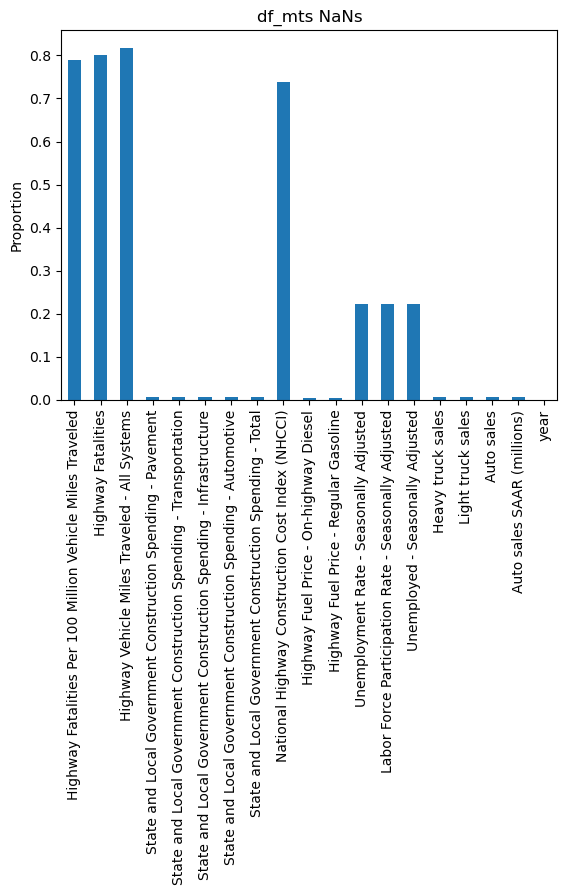

In [102]:
# Extract and create a new column year from the date column
df_mts = pd.read_csv('mts.csv').drop('Index', axis=1)
year = df_mts['Date'].str.extract(r'/(\d+)\s12', expand=False).astype(int)
df_mts['year'] = year

# Filter for years desired
### CHANGE FOR MORE YEARS? len(df) in range [2000, 2022] contains only 275 entries ###
df_mts = df_mts[(df_mts['year']<=2022) & (df_mts['year']>=2000)]

# Filter for columns wated
### CHANGE FOR MORE COLUMNS? ###
df_mts_column_filter = df_mts.columns[[2, 3, 12, 34, 45, 61, 76, 82, 83, 84, 85, 95, 96, 97, 117, 119, 120, 129, 135]]
df_mts = df_mts[df_mts_column_filter]

# Compute proportion of NaNs in each column
df_mts_nan_proportion = abs(df_mts.describe().iloc[0:1].sub(len(df_mts))).div(len(df_mts))
df_mts_nan_proportion = df_mts_nan_proportion.rename({'count':'NaN Proportion'})

# Visualize
print(df_mts_nan_proportion.squeeze()) # squeeze condenses a DataFrame to a Series
plt.title('df_mts NaNs')
df_mts_nan_proportion.squeeze().plot.bar()
plt.ylabel('Proportion')
plt.show()

The following colums have more than $50\%$ `NaN` values:
* Highway Fatalities Per 100 Million Vehicle Miles Traveled
* Highway Fatalities
* Highway Vehicle Miles Traveled - All Systems
* National Highway Construction Cost Index (NHCCI)

Maybe also drop these columns?

In [103]:
# Explore the types for all columns filtered so far
df_mts.dtypes

Highway Fatalities Per 100 Million Vehicle Miles Traveled            float64
Highway Fatalities                                                   float64
Highway Vehicle Miles Traveled - All Systems                         float64
State and Local Government Construction Spending - Pavement          float64
State and Local Government Construction Spending - Transportation    float64
State and Local Government Construction Spending - Infrastructure    float64
State and Local Government Construction Spending - Automotive        float64
State and Local Government Construction Spending - Total             float64
National Highway Construction Cost Index (NHCCI)                     float64
Highway Fuel Price - On-highway Diesel                               float64
Highway Fuel Price - Regular Gasoline                                float64
Unemployment Rate - Seasonally Adjusted                              float64
Labor Force Participation Rate - Seasonally Adjusted                 float64

In [104]:
# Print out new column numbers for faster nav
for i, column in enumerate(df_mts.columns):
    print(str(i) + " : " + column)

0 : Highway Fatalities Per 100 Million Vehicle Miles Traveled
1 : Highway Fatalities
2 : Highway Vehicle Miles Traveled - All Systems
3 : State and Local Government Construction Spending - Pavement
4 : State and Local Government Construction Spending - Transportation
5 : State and Local Government Construction Spending - Infrastructure
6 : State and Local Government Construction Spending - Automotive
7 : State and Local Government Construction Spending - Total
8 : National Highway Construction Cost Index (NHCCI)
9 : Highway Fuel Price - On-highway Diesel
10 : Highway Fuel Price - Regular Gasoline
11 : Unemployment Rate - Seasonally Adjusted
12 : Labor Force Participation Rate - Seasonally Adjusted
13 : Unemployed - Seasonally Adjusted
14 : Heavy truck sales
15 : Light truck sales
16 : Auto sales
17 : Auto sales SAAR (millions)
18 : year


Only numerical data.

In [149]:
# Graphing helper method
# df: DataFrame grouped by year
# columns: list containing the GROUP of State and Local Government Construction Spending
# ie. State and Local Government Construction Spending - Pavement, GROUP = "Pavement"
# Plots line plot
def plot_line_year_agg(df_grouped, columns, log_transform, normalize):
    # RESET index so helper works
    df_grouped = df_grouped.reset_index()
    # Oh god code looking ugly 
    ### IF LOG TRANSFORM ###
    if log_transform:
        df_grouped = df_grouped.reset_index()
        # Loop to plot
        title_string = ""
        for column in columns:
            column_string = 'State and Local Government Construction Spending - ' + column
            plt.plot(df_grouped['year'], [np.log(data) if data!=0 else 0 for data in df_grouped[column_string]], label=column)
            title_string + title_string + column + ', '
    ### IF NORMALIZE ###
    elif normalize:
        # Loop to plot
        title_string = ""
        for column in columns:
            column_string = 'State and Local Government Construction Spending - ' + column
            plt.plot(df_grouped['year'], zscore(df_grouped[column_string]), label=column)
            title_string + title_string + column + ', '
    ### NEITHER LOG TRANSFORM OR NORMALIZE ###
    else:
        # Loop to plot
        title_string = ""
        for column in columns:
            column_string = 'State and Local Government Construction Spending - ' + column
            plt.plot(df_grouped['year'], df_grouped[column_string], label=column)
            title_string + title_string + column + ', '
        
    # legends & labels
    plt.legend()
    plt.title('Construction Spending over the Years: {}'.format(title_string[:-2])) # slicing to get rid of last comma
    if log_transform:
        plt.ylabel('log(Spending)')
    else:
        plt.ylabel('Spending')
    plt.xlabel('Year')
    plt.show()

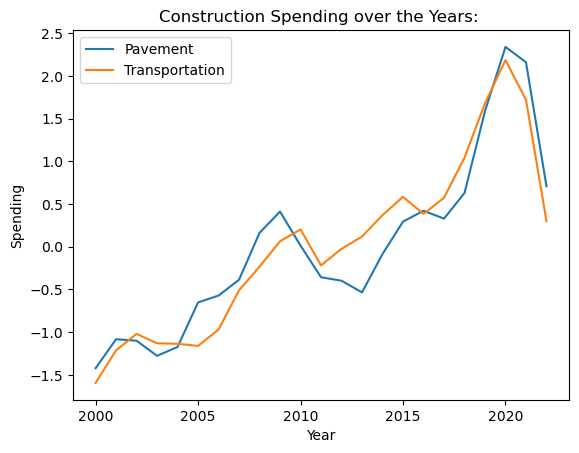

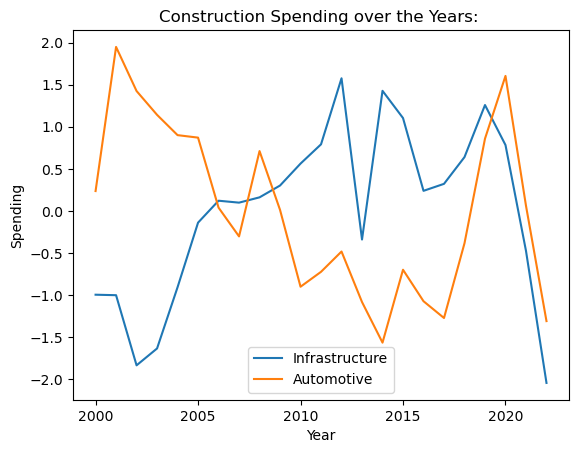

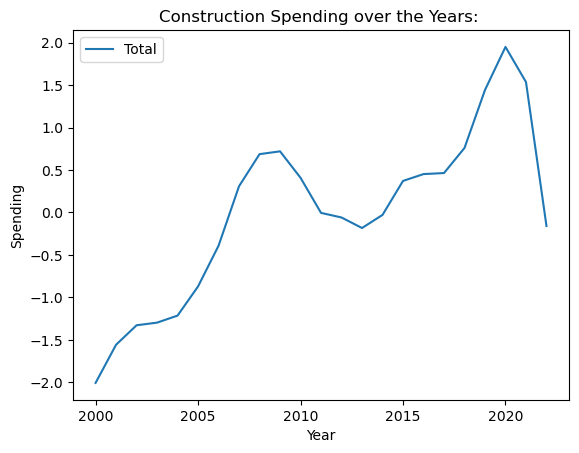

In [150]:
# aggregate by year to determine total spending on State and Local Government Construction Spending
df_mts_grouped_year = df_mts.groupby('year').sum()
plot_line_year_agg(df_mts_grouped_year, ['Pavement', 'Transportation'], False, True)
plot_line_year_agg(df_mts_grouped_year, ['Infrastructure', 'Automotive'], False, True)
plot_line_year_agg(df_mts_grouped_year, ['Total'], False, True)

In [151]:
### DEPRECATED CUZ DECIDED TO PUT INTO HELPER ###        
# df_grouped_year = df.groupby('year').sum()

# plot lineplots
# from trial and error, plot pavement and transportation together, infra and auto together, total separate

# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Pavement'], label='Pavement')
# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Transportation'], label='Transportation')
# plt.legend()
# plt.title('Construction Spending over the Years: Pavement & Transportation')
# plt.ylabel('Spending')
# plt.xlabel('Year')
# plt.show()

# plt.figure()
# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Infrastructure'], label='Infrastructure', color='green')
# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Automotive'], label='Automotive', color='red')
# plt.legend()
# plt.title('Construction Spending over the Years: Infra & Auto')
# plt.ylabel('Spending')
# plt.xlabel('Year')
# plt.show()

# plt.figure()
# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Total'], label='Total', color='purple')
# plt.legend()
# plt.title('Construction Spending over the Years: Total')
# plt.ylabel('Spending')
# plt.xlabel('Year')
# plt.show()
### DEPRECATED CUZ DECIDED TO PUT INTO HELPER ###

In [152]:
# Begin connecting above df with df_gdp (U.S. GDP 1960-2022 dataset)
# Preprocessing on 'date' column of df_gdp
df_gdp_year = df_gdp['date'].str.extract('(\d+)-', expand=False)
df_gdp['year'] = df_gdp_year.astype(int)
df_gdp

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change,year
0,1960-12-31,543.300000,3007.1234,NaN,1960
1,1961-12-31,563.300000,3066.5629,2.3000,1961
2,1962-12-31,605.100000,3243.8431,6.1000,1962
3,1963-12-31,638.600000,3374.5152,4.4000,1963
4,1964-12-31,685.800000,3573.9412,5.8000,1964
...,...,...,...,...,...
57,2017-12-31,19479.620056,59914.7778,2.2557,2017
58,2018-12-31,20527.156026,62805.2538,2.9189,2018
59,2019-12-31,21372.572437,65094.7994,2.2889,2019
60,2020-12-31,20893.743833,63027.6795,-3.4046,2020


In [153]:
# PERFORM LEFT JOIN on 'year'
# First group by year on df_mts (don't want duplicate years)
df_mts_grouped_year = df_mts.groupby('year').sum()
df_mts_gdp = df_mts_grouped_year.merge(df_gdp, how='left', left_on='year', right_on='year')
df_mts_gdp.columns

Index(['year', 'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
       'Highway Fatalities', 'Highway Vehicle Miles Traveled - All Systems',
       'State and Local Government Construction Spending - Pavement',
       'State and Local Government Construction Spending - Transportation',
       'State and Local Government Construction Spending - Infrastructure',
       'State and Local Government Construction Spending - Automotive',
       'State and Local Government Construction Spending - Total',
       'National Highway Construction Cost Index (NHCCI)',
       'Highway Fuel Price - On-highway Diesel',
       'Highway Fuel Price - Regular Gasoline',
       'Unemployment Rate - Seasonally Adjusted',
       'Labor Force Participation Rate - Seasonally Adjusted',
       'Unemployed - Seasonally Adjusted', 'Heavy truck sales',
       'Light truck sales', 'Auto sales', 'Auto sales SAAR (millions)', 'date',
       ' GDP ( Billions of US $)', ' Per Capita (US $)', ' Annual % Chang

In [154]:
zscore(np.array(df_mts_gdp[' GDP ( Billions of US $)']).reshape(-1, 1)[:-1])

array([[-1.54337006],
       [-1.4527091 ],
       [-1.35761034],
       [-1.21316686],
       [-1.00478552],
       [-0.77962554],
       [-0.5669611 ],
       [-0.38654957],
       [-0.30557173],
       [-0.38549828],
       [-0.22912019],
       [-0.07825762],
       [ 0.10094981],
       [ 0.26234582],
       [ 0.45613789],
       [ 0.63564567],
       [ 0.7696149 ],
       [ 0.98450394],
       [ 1.27144001],
       [ 1.50301246],
       [ 1.371854  ],
       [ 1.94772141]])

In [157]:
# Similar helper as above, also plots GDP
# Calls previous helper plot_line_year_agg
### NEED TO PLOT NORMALIZED OTHERWISE SCALED IS SCREWED
### LOG TRANSFORM?
def plot_line_year_gdp(df_merged, columns):
    # Necessary preprocessing to get zscore (normalization)
    df_merged['GDP ($)'] = df_merged[' GDP ( Billions of US $)'] * 10**9 # WHY IS THERE A SPACE B4 GDP
    normalized_data = zscore(np.array(df_merged['GDP ($)']).reshape(-1, 1)[:-1]) # -1 cuz last element is a NaN
    plt.plot(df_merged['year'][:-1], normalized_data, label='GDP ($)')
    plot_line_year_agg(df_merged, columns, False, True) # SET NORMALIZE TO TRUE

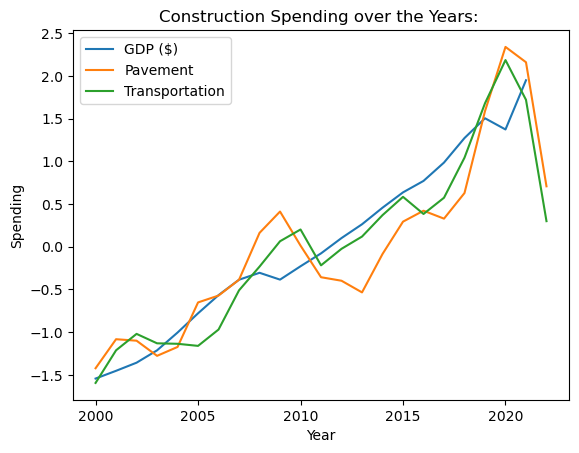

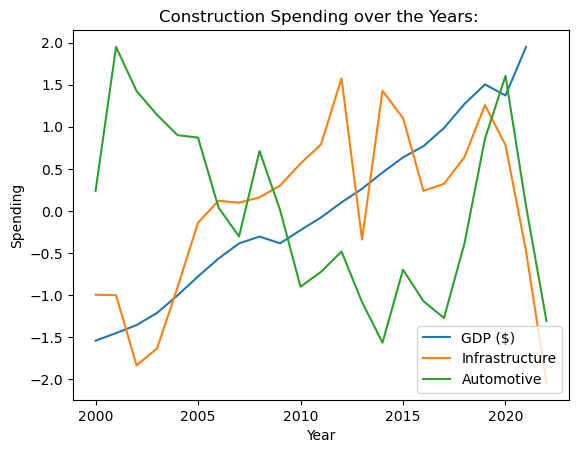

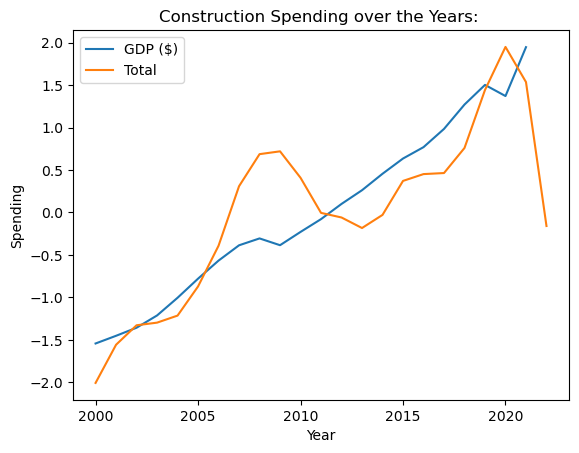

In [158]:
# Use helper
plot_line_year_gdp(df_mts_gdp, ['Pavement', 'Transportation'])
plot_line_year_gdp(df_mts_gdp, ['Infrastructure', 'Automotive'])
plot_line_year_gdp(df_mts_gdp, ['Total'])